# Lab 3

Sierra Wilde and Michael Higgins

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

## Problem 1

### A.

In order to help identify where the temperature reading deviates significantly from the 12K associated with the experiment, 100,000 data points are simulated with a Gaussian distribution with a mean of 12 and a standard deviation of 0.4. A Gaussian distribution is described by: $P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(x-\mu)^2}{2\sigma^2}}$, where $\mu$ is the mean and $\sigma$ is the standard deviation. After the good data is generated, data that is known to be bad, or not at the near constant temperature, is added.

In [2]:

good_data = stats.norm.rvs(loc=12, scale=0.4, size=100000)


bad_data = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]

### 1.

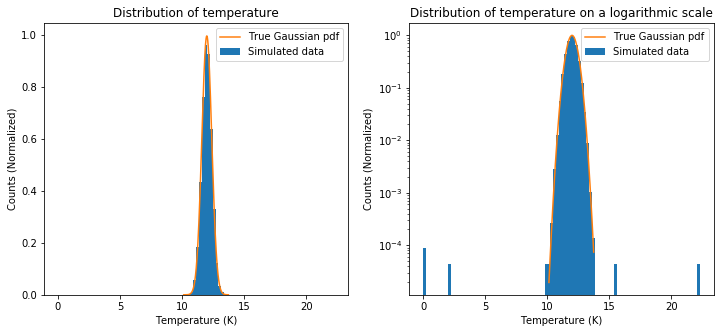

In [16]:


all_data = np.append(good_data, bad_data)

x = np.linspace(good_data.min(), good_data.max(), 100000)
perfect_pdf = stats.norm.pdf(x, loc=12, scale=0.4)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].set_title('Distribution of temperature')
ax[0].set_xlabel('Temperature (K)')
ax[0].set_ylabel('Counts (Normalized)')
ax[0].hist(all_data, bins=100, density=True, label='Simulated data')
ax[0].plot(x, perfect_pdf, label='True Gaussian pdf')
ax[1].set_title('Distribution of temperature on a logarithmic scale')
ax[1].set_xlabel('Temperature (K)')
ax[1].set_ylabel('Counts (Normalized)')
ax[1].hist(all_data, bins=100, density=True, label='Simulated data')
ax[1].plot(x, perfect_pdf, label='True Gaussian pdf')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()

plt.show()

The simulated plots do indeed appear to follow a Gaussian distribution. The regular distribution plot has the characteristic bell-shaped curve, and the logarithmic plot looks parabolic aside from a few outliers that are known to be the bad data. Additionally, both plots fit nicely to a perfect Gaussian probability distribution with the same parameters as the simulation.

### 2.

Since the goal of this study is to determine which events are errors, and can not be identified with the constant 12K temperature, the values that do not follow the background Gaussian distribution need to be identified and then eliminated. The question that will help determine this is as follows:
What data points in the temperature distribution, which has a background Gaussian distribution with a mean of 12K and a standard deviation of 0.4K, are significant enough to be considered outside of the background?

### 3.

In this case we have a double-ended test. Both tails of the Gaussian must be considered in the statistical test instead of only one tail, because large temperature deviations can occur both above and below the mean. In order to find the probability associated with measuring a value of equal or lesser/greater value, the probabilifty distribution function is integrated over a certain integral. Below is the probability over the intervals from the significant value, $\chi$ to $\infty$ and from $-\infty$ to $-\chi$. $\chi$ will depend on the probability needed to determine whether data is significant. Any values outside $-\chi$ and $\chi$ will be considered not part of the background and removed from the rest of the dataset.

$\int_{-\infty}^{-\chi}\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(x-\mu)^2}{2\sigma^2}} = \frac{1}{2}-\frac{1}{2}\mathrm{erf}(\frac{\chi-\mu}{\sqrt{2}\sigma})$

$\int_{\chi}^{\infty}\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(x-\mu)^2}{2\sigma^2}} = \frac{1}{2}-\frac{1}{2}\mathrm{erf}(\frac{\chi-\mu}{\sqrt{2}\sigma})$

$\mu$ is the mean temperature 12K, and $\sigma$ is the standard deviation 0.4K.

### 4.

In order to solve for $\chi$, the relation above must be set equal to the probability of $X{\sigma}$ of a standard Gaussian distribution, with a mean of 0 and a standard deviation of 1:

$P(\pm X\sigma) = 1-\mathrm{erf}(\frac{X\sigma}{\sqrt{2}})$

$1-\mathrm{erf}(\frac{\chi-\mu}{\sqrt{2}\sigma}) = 1-\mathrm{erf}(\frac{X\sigma}{\sqrt{2}})$

$\frac{\chi-\mu}{\sigma} = X\sigma$

Because values at both tails should be considered when determining significance, $\chi = X\sigma\cdot\sigma\pm\mu$

Values outside the range of $-\chi$ to $\chi$ can be considered statistically significant. After plugging in the known values of $\sigma$ and $\mu$: $\chi = 0.4X\sigma\pm12$.

Choosing $X\sigma = 5$, this means that $\chi = 10, 14$. Any temperature that is higher or lower than this range can be discarded as faulty.

In [45]:
good_kept = len(good_data[np.where((np.asarray(good_data) < 14) & (np.asarray(good_data) > 10))])
good_discard = len(good_data) - good_kept
bad_data_arr = np.asarray(bad_data)
bad_kept = len(bad_data_arr[np.where((bad_data_arr < 14) & (bad_data_arr > 10))])
bad_discard = len(bad_data) - bad_kept
truth_table = pd.DataFrame(np.array([[good_kept, bad_kept], [good_discard, bad_discard]]), index=['Kept', 'Discarded'], columns=['Good data', 'Bad data'])

In [47]:
truth_table

,Good data,Bad data
Kept,100000,2
Discarded,0,6


This is the truth value table associated with a 5$\sigma$ significance. The first row is the number of data values determined not to be significant, and the second row is the number of data values determined to be significant. All of the good data was determined not to be significant, along with one fourth of the bad data.

### B.

The smaller the chosen $X\sigma$ is for the statistical threshold, the larger the proportion of good data is rejected. The percentage of data within 1, 2, and 3 standard deviations follows 68%, 95%, and 99.7% respectively for a Gaussian distribution. Increasing the threshold will follow this pattern where if $X\sigma = 1, 2, 3$ the percent of good data omited would be 32%, 5% and 0.3% respectively (this relation would be different if the distribution were not Gaussian). Therefore, the statistical threshold chosen holds predictive capabilities for the amount of data omitted.

### C.

There are mistakes in the commision. As seen in the truth table in A.4., a quarter of the bad data has not been rejected at a 5$\sigma$ value. These mistakes are avoidable, however more and more good data gets omitted as one tries to omit all of the bad data, because the statistical threshold must decrease. The only way to rle out any mistakes would be to have a threshold of 0$\sigma$, which then omits essentially all of the good data as well.

## Problem 2

In order to determine whether or not there is an asteroid in the image, the movement of a data point must be statistically significant. The total distance would be defined as $r = \sqrt{\Delta x^2+\Delta y^2}$, this distance must be of a great enough value in order to be considered an asteroid. Given that the background of the movement is described as a 2 dimensional, rotationaly symmetric Gaussian distribution with a mean of 0 and a standard deviation of 1 arcsecond, what amount of movement would be considered statistically significant?

Since the background distribution is rotationally symmetric, the signficance of r will be the same as the significance of $\Delta x$ when $\Delta y$  is zero and vice versa, at any threshold. Therefore, only the significance of either $\Delta x$ or $\Delta y$ needs to be calculated. 

Similar to the steps in Problem 1 A.4., the background probability distribution function is set equal to that of a standard Gaussian with a mean of 0 and standard deviation of 1. $\rho$ would be the minimum value of $\sqrt{\Delta x^2+\Delta y^2}$ in order to be statistically significant.

$\int_{-\infty}^{-\rho}\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(\Delta x-\mu)^2}{2\sigma^2}} = \frac{1}{2}-\frac{1}{2}\mathrm{erf}(\frac{\rho-\mu}{\sqrt{2}\sigma})$

$\int_{\rho}^{\infty}\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(\Delta x-\mu)^2}{2\sigma^2}} = \frac{1}{2}-\frac{1}{2}\mathrm{erf}(\frac{\rho-\mu}{\sqrt{2}\sigma})$

$P(\pm X\sigma) = 1-\mathrm{erf}(\frac{X\sigma}{\sqrt{2}})$

$1-\mathrm{erf}(\frac{\rho-\mu}{\sqrt{2}\sigma}) = 1-\mathrm{erf}(\frac{X\sigma}{\sqrt{2}})$

$\rho = X\sigma \cdot \sigma \pm \mu$

Since $\sigma = 1$ and $\mu = 0$, $\rho = 5$ with a significance threshold $X\sigma = 5$.

## Problem 3

The moon should effectively block cosmic rays from its portion of the sky. If a patch of sky following the moon gets 6800 cosmic rays over 8 hours every day for 15 days, or 7200 minutes, and the background is a Poisson distribution with an expected parameter 1 cosmic ray per minute, what is the statistical significance of measurement of 6800 counts?

7200